## ** Dataset Carros ** ## 

Dataset sobre carros importados em 1985, com informações sobre diversas características físicas/mecânicas, risco atribuidos por seguradoras e taxa de dasvalorização.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn as skl

In [7]:
df = pd.read_csv('carros.csv', decimal='.', encoding="cp1252") # para abrir o data set

In [8]:
df.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


O primeiro passo, ao se trabalhar com um conjunto de dados, é conhecer as suas principais particularidades. Abaixo, descrevemos as informações contidas neste dataset.

In [6]:
df.info() # nos dá as informações gerais sobre os dados de cada coluna e dados gerais do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
riskiness            159 non-null int64
losses               159 non-null int64
make                 159 non-null object
fuel type            159 non-null object
aspiration           159 non-null object
doors                159 non-null object
body                 159 non-null object
drive                159 non-null object
engine location      159 non-null object
wheel base           159 non-null float64
length               159 non-null float64
width                159 non-null float64
height               159 non-null float64
weight               159 non-null int64
engine type          159 non-null object
cylinders            159 non-null object
engine size          159 non-null int64
fuel system          159 non-null object
bore                 159 non-null float64
stroke               159 non-null float64
compression ratio    159 non-null float64
horsepower           159 non-nu

In [7]:
df[df.isnull().any(axis=1)] # confirmando se não há células com valores nulos

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price


O Dataset é formado por 159 linhas em 26 colunas com variáveis integrais, floats e strings. Ele não apresenta NaN values.

### ** 1. Análise Exploratória de Dados ** ###

### 1.1. Tipos de Variáveis:####

Após verificar os dados gerais do data set, observamos os valores que estão no interior de cada coluna para classificá-las como númerica ou categórica para assim poder fazer algumas análises preliminares.

As variáveis contidas e seus significados estão abaixo:

1. riskiness: Classificação do risco associado à subscrição de uma nova apólice e o prêmio que deve ser cobrado pela cobertura 
2. losses: Taxa de desvalorização 
3. make: Fabricante 
4. fuel type: tipo de combustível 
5. aspiration: simples ou turbinados 
6. doors: quantidade de portas 
7. body: tipo de carro (sedam, perua...) 
8. drive: Tração 
9. engine location: localização do motor 
10. wheel base: distância entre os eixos das rodas dianteiras e traseiras
11. length: comprimento
12. width: largura
13. height: altura
14. weight: peso
15. engine type: tipo de motor
16. cylinders: quantidade de cilindros 
17. engine size: tamanho do motor
18. fuel system: Injeção de combustível 
19. bore: diâmetro do cilindro
20. stroke: tempo do motor (ciclo)
21. compression ratio: Taxa de compressão 
22. horsepower: cavalos de potência
23. peak rpm: pico velocidade de rotação do motor
24. city mpg: eficiência do combustível na cidade (milhas por galão)
25. highway mpg: eficiência do combustível na estrada (milhas por galão)
26. price: preço

## 1.2. Estatística Básica ## 

#### * 1.1. Dados Brutos *  ####

*Variáveis quantitativas:*

In [14]:
df.describe() #observando medidas de posição e desvios

,riskiness,losses,wheel base,length,width,height,weight,engine size,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.729560
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,5877.856195
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,7372.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,14719.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,35056.000000


C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib

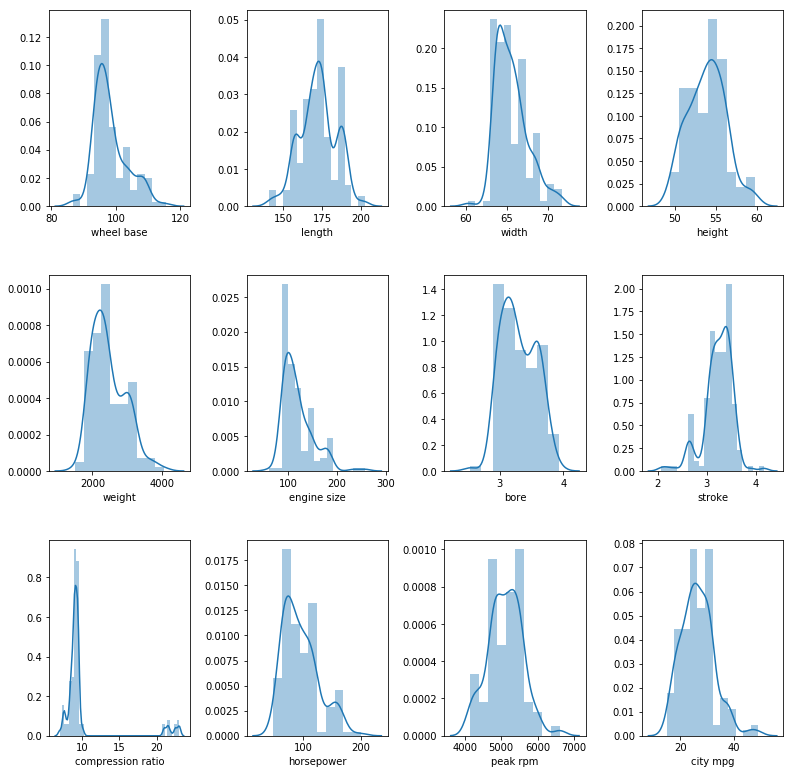

In [15]:
features0 = ["wheel base", "wheel base", "length", "width", "height", "weight", "engine size", "bore", "stroke",
             "compression ratio", "horsepower", "peak rpm", "city mpg", "highway mpg", "price","losses"]
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12,12))
for col, ax in zip(features0[1:], axs.ravel()):
    x=df.loc[:,col]
    sns.distplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4);

*Variáveis qualitativas categóricas:*

In [16]:
df.describe(include=['O'])

,make,fuel type,aspiration,doors,body,drive,engine location,engine type,cylinders,fuel system
count,159,159,159,159,159,159,159,159,159,159
unique,18,2,2,2,5,3,1,5,5,6
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,31,144,132,95,79,105,159,123,136,64


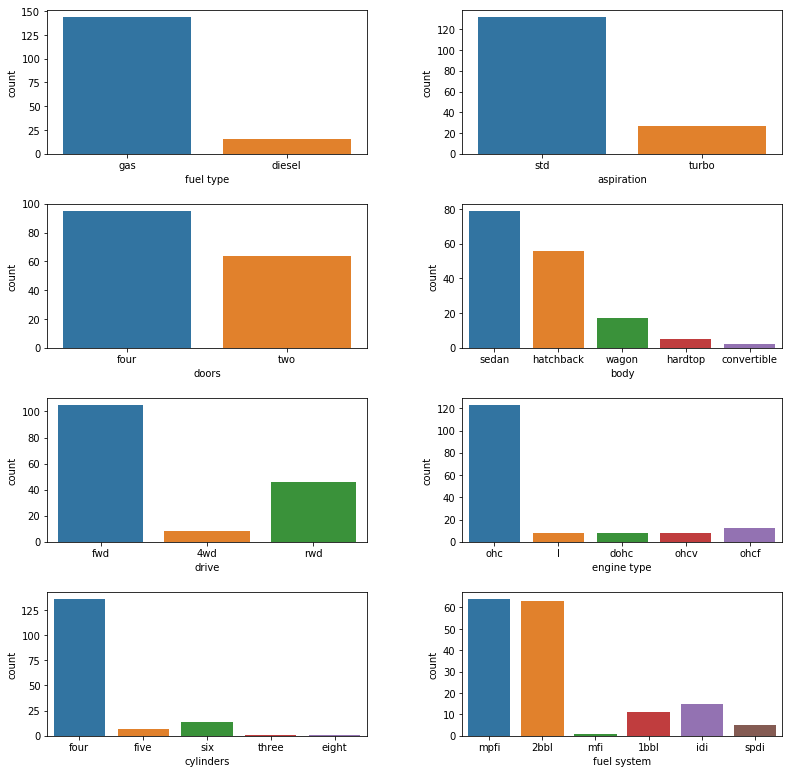

In [17]:
variaveis_categoricas = ['make', 'fuel type', 'aspiration', 'doors', 'body',
               'drive', 'engine type', 'cylinders', 'fuel system']
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12, 12))
for col, ax in zip(variaveis_categoricas[1:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.3)

Podemos notar queo dataset contém:
1. Há mais carros movidos a gasolina
2. Carros std
3. Carros com quatro portas
4. Carros modelo sedam
5. Carro com tração dianteira
6. A maior parte dos carros tem o motor tipo ohc, uma vez que as outras denominações são uma variedade deste tipo de motor
7. A maior parte dos carros possuem quatro cilindros
8. Relativo ao seu sistema de abastecimento temos um empate entre o sistema mpfi e 2bbl.



Como a variável riskiness classifica os carros em seis categorias, plotamos um gráfico a parte dela para entender como os carros se distrubem na variável

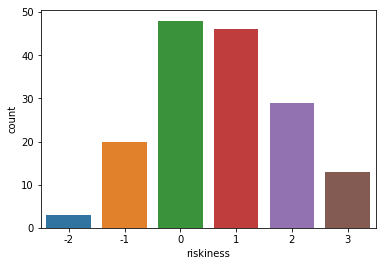

In [18]:
sns.countplot(df['riskiness']);

*Correlação*

Buscando compreender se há correlação entre as diferentes variáveis do dataset, plotamos um heatmap, conforme abaixo:

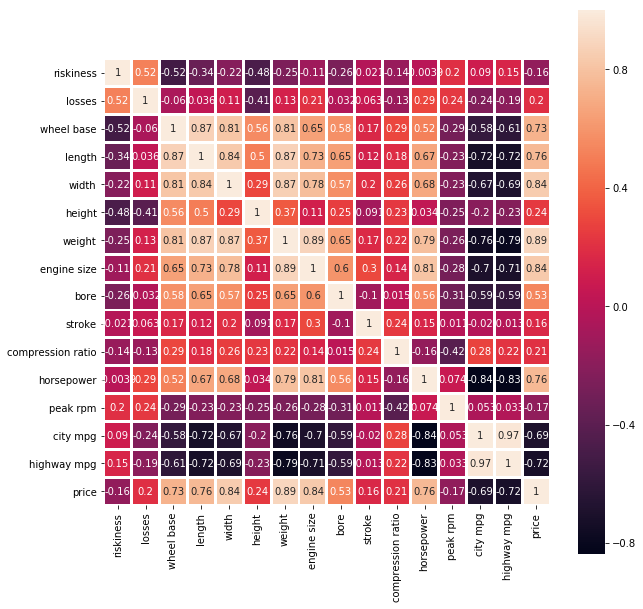

In [19]:
cm = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True,linewidths=2, linecolor='white', square =True)
plt.yticks(rotation =0)
plt.xticks(rotation =90);

**Insights**

1. A variável risco está correlacionada ao tamanho da roda.
2. A variável cumprimento está correlacionada a milhas por galão na cidade e na estrada
3. A variável horsepower está correlacionada a a milhas por galão na cidade e na estrada.
4. A variável preço se correlaciona com o estrada/mpg, potência do motor, tamanho do motor,peso, 
largura, comprimento, aro da roda.
5. Carros mais pessados são mais caros, possivelmente esses carros são carros SUV.

Na primeira análise opto por observar as informações pela variável marca.

####  1.3.  Preparação dos Dados ####

Optamos por categorizar os dados pela marca e assim termos uma noção de como os dados se apresentam em seu conjunto. 

#### *  1.3.1. Tipo de Combustível * ####

Como temos dois tipos de combustível, verificaremos a porcentagem de cada tipo por marca para analisar o tipo de combustível que mais aparece no conjuto de dados.

In [20]:
combustivel = pd.read_csv('carros.csv', usecols = ['make','fuel type'])
combustivel.head() #criamos um dataset apenas com essas variáveis

,make,fuel type
0,audi,gas
1,audi,gas
2,audi,gas
3,audi,gas
4,bmw,gas


In [21]:
combustivel['fuel type'].unique()

array(['gas', 'diesel'], dtype=object)

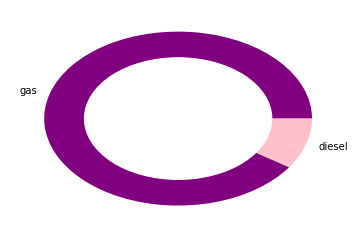

In [22]:
divisao = combustivel['fuel type'].value_counts()
plt.pie(divisao, labels=['gas','diesel'], colors=['purple','pink'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show;

Temos muito mais carros movidos a gasolina do que a diesel. No momento de trabalhar com os grupos de dados precisamos filtrar esta informação e deletar os carros a diesel.

#### *  1.3.2. Carros por Montadora * ####

In [23]:
df.make.unique()

array(['audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'jaguar', 'mazda',
       'mercedes-benz', 'mitsubishi', 'nissan', 'peugot', 'plymouth',
       'porsche', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [24]:
a = pd.read_csv('carros.csv', usecols = ['make','fuel type'])
marca_fuel = a[a['fuel type'] == 'gas'] # para termos apenas carros à gasolina
marca_fuel.head()
marca_fuel['fuel type'].unique() # checando se temos apenas carros à gasolina

array(['gas'], dtype=object)

In [25]:
marcas = marca_fuel.make.value_counts(sort=True)
marca = marcas.rename_axis('montadora').reset_index(name='qtde_montadora')                                 

In [26]:
montadoras = marca.montadora.tolist()
print(montadoras)

['toyota', 'nissan', 'honda', 'subaru', 'mazda', 'mitsubishi', 'volvo', 'dodge', 'plymouth', 'saab', 'volkswagen', 'peugot', 'audi', 'bmw', 'chevrolet', 'jaguar', 'mercedes-benz', 'porsche']


In [27]:
qtde = marca.qtde_montadora.tolist()
print(qtde)

[28, 17, 13, 12, 11, 10, 10, 8, 6, 6, 5, 4, 4, 4, 3, 1, 1, 1]


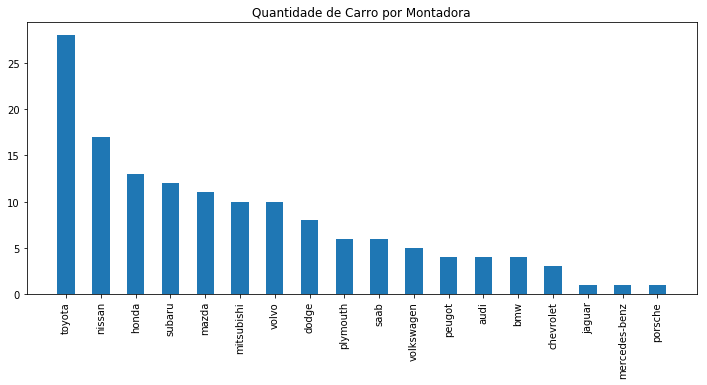

In [28]:
plt.figure(figsize=(12,5))
plt.bar(montadoras,qtde, width = 0.5,)
plt.xticks(['toyota', 'nissan', 'honda', 'subaru', 'mazda', 
            'volvo', 'mitsubishi', 'dodge', 'volkswagen', 
            'peugot', 'plymouth', 'saab', 'mercedes-benz', 'audi',
            'bmw', 'chevrolet', 'jaguar', 'porsche'], rotation=90)
plt.title('Quantidade de Carro por Montadora')
plt.show()

#### *  1.3.3.  Marca por Valor * ####

In [29]:
b = pd.read_csv('carros.csv', usecols = ['make','fuel type','price'])
valor_fuel = b[b['fuel type'] == 'gas'] # para termos apenas carros à gasolina
valor_fuel.head()
valor_fuel['fuel type'].unique() # checando se temos apenas carros à gasolina

array(['gas'], dtype=object)

In [30]:
valor = valor_fuel.copy()
valor.drop(columns='fuel type', inplace = True)
valor.head()

,make,price
0,audi,13950
1,audi,17450
2,audi,17710
3,audi,23875
4,bmw,16430


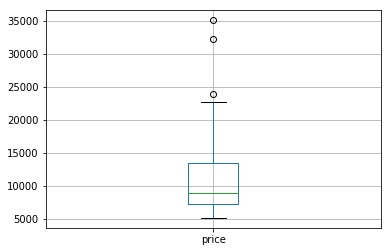

In [31]:
valor.boxplot();

Analisando o boxplot percebemos que há três valores que podemos considerar como outliers neste conjunto de dados. Por isso usaremos o preço mediano para cada marca, mantendo assim centralidade da distribuição.

In [32]:
valor_medio = valor.groupby('make', as_index= False).median()
valor_medio.columns = ['montadora','preco_medio']
valor_medio.head()

,montadora,preco_medio
0,audi,17580.0
1,bmw,18947.5
2,chevrolet,6295.0
3,dodge,7150.5
4,honda,7295.0


In [33]:
def arredondar (num):
    return float ( '%.2f'% (num))
valor_medio['preco_medio']=valor_medio['preco_medio'].apply(arredondar)
valor_medio.head()

,montadora,preco_medio
0,audi,17580.0
1,bmw,18947.5
2,chevrolet,6295.0
3,dodge,7150.5
4,honda,7295.0


#### *  1.3.4 Marca por Risco * ####

In [34]:
c = pd.read_csv('carros.csv', usecols = ['make','fuel type','riskiness'])
risco = c[c['fuel type'] == 'gas'] # para termos apenas carros à gasolina
risco.head()
risco['fuel type'].unique() # checando se temos apenas carros à gasolina

array(['gas'], dtype=object)

In [35]:
riscos = risco.copy()
riscos.drop(columns='fuel type', inplace = True)
riscos.head()

,riskiness,make
0,2,audi
1,2,audi
2,1,audi
3,1,audi
4,2,bmw


In [36]:
riscos.riskiness.unique()

array([ 2,  1,  0, -1,  3, -2], dtype=int64)

In [37]:
riscos[(riscos['make'] == 'audi')].mode()

,riskiness,make
0,1,audi
1,2,NaN


Antes de prosseguirmos olhamos os dados relativos aos carros da marca audi, uma vez que eles apresentam riscos diferentes.

In [38]:
audi_riscosevalores = df[df['make'] == 'audi']
audi_riscosevalores.sort_values( by= 'price')

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875


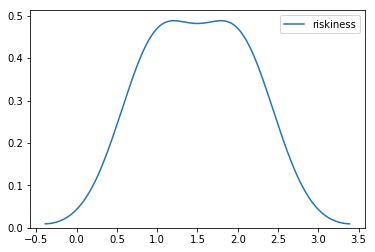

In [39]:
sns.kdeplot(audi_riscosevalores['riskiness']);

Como risco é uma variável quantitativa discreta, adotaremos como padrão para essa variável o valor 1.

In [40]:
risco_medio = riscos.groupby('make',as_index= False).agg(lambda x: 
                                                        scipy.stats.mode(x)[0])
risco_medio.head()

,make,riskiness
0,audi,1
1,bmw,0
2,chevrolet,0
3,dodge,1
4,honda,0


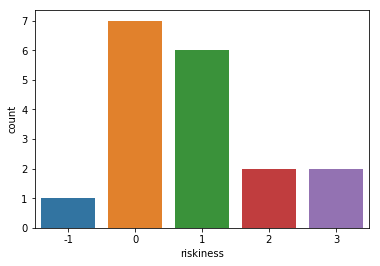

In [41]:
sns.countplot(risco_medio['riskiness']);

Observamos que a maioria dos carros está classificado como risco = 0.

#### *  1.3.5 Marca por KM/cidade * ####

In [42]:
d = pd.read_csv('carros.csv', usecols = ['make','city mpg','fuel type'])
kmcity = d[d['fuel type'] == 'gas'] # para termos apenas carros à gasolina
kmcity.head()

,make,fuel type,city mpg
0,audi,gas,24
1,audi,gas,18
2,audi,gas,19
3,audi,gas,17
4,bmw,gas,23


In [43]:
kmcity['fuel type'].unique() # checando se temos apenas carros à gasolina

array(['gas'], dtype=object)

In [44]:
kmcidade = kmcity.copy()
kmcidade.drop(columns='fuel type', inplace = True)
kmcidade.head()

,make,city mpg
0,audi,24
1,audi,18
2,audi,19
3,audi,17
4,bmw,23


[15, 49]

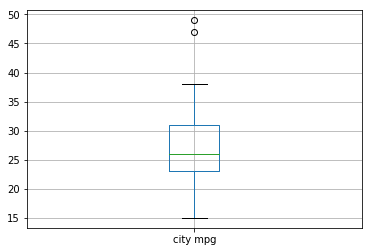

In [45]:
kmcidade.boxplot()
[kmcidade['city mpg'].min(),kmcidade['city mpg'].max()] # para saber o valor mínimo e máximo da distribuição

Percebemos que os valores de mpg possuem apenas dois outliers. Porém como a mediana é uma medida mais robusta, utilizaremos ela como padrão.

In [46]:
kmcidade_medio = kmcidade.groupby('make', as_index= False).median()
kmcidade_medio.head()

,make,city mpg
0,audi,18.5
1,bmw,22.0
2,chevrolet,38.0
3,dodge,31.0
4,honda,30.0


O consumo médio de cada marca está em MPG (milhas por galão) nós transformaremos em km/l já que é essa a unidade de medida que é utilizada no Brasil.

In [47]:
consumo_cidade = kmcidade_medio.copy()
consumo_cidade.columns=['montadora','km/litro'] #traduzimos o nome das colunas para português.
consumo_cidade.head()

,montadora,km/litro
0,audi,18.5
1,bmw,22.0
2,chevrolet,38.0
3,dodge,31.0
4,honda,30.0


In [48]:
consumo_cidade['km/litro']=consumo_cidade['km/litro']/2.352 # fazemos a conversão de mpg para km/litro
consumo_cidade.head()

,montadora,km/litro
0,audi,7.865646
1,bmw,9.353741
2,chevrolet,16.156463
3,dodge,13.180272
4,honda,12.755102


In [49]:
consumo_cidade['km/litro']= consumo_cidade['km/litro'].apply(arredondar)
consumo_cidade.head() # arredondamos as casas decimais para duas unidades.

,montadora,km/litro
0,audi,7.87
1,bmw,9.35
2,chevrolet,16.16
3,dodge,13.18
4,honda,12.76


#### 2.2.5 Marca por KM/estrada ####

In [50]:
e = pd.read_csv('carros.csv', usecols = ['make','highway mpg','fuel type'])
kmhighawy = e[e['fuel type'] == 'gas'] # para termos apenas carros à gasolina
kmhighawy.head()

,make,fuel type,highway mpg
0,audi,gas,30
1,audi,gas,22
2,audi,gas,25
3,audi,gas,20
4,bmw,gas,29


In [51]:
kmhighawy['fuel type'].unique() # checando se temos apenas carros à gasolina

array(['gas'], dtype=object)

In [52]:
kmestrada = kmhighawy.copy()
kmestrada.drop(columns='fuel type', inplace = True)
kmestrada.head()

,make,highway mpg
0,audi,30
1,audi,22
2,audi,25
3,audi,20
4,bmw,29


[18, 54]

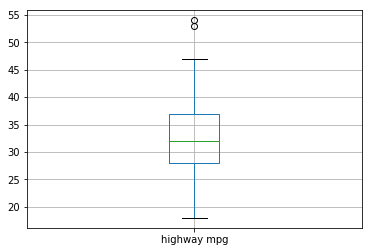

In [53]:
kmestrada.boxplot()
[kmestrada['highway mpg'].min(),kmestrada['highway mpg'].max()] # para verificar valor min e máx da distribiução

Percebemos que os valores de mpg possuem apenas dois outliers, assim como . Porém como a mediana é uma medida mais robusta, utilizaremos ela como padrão.

In [54]:
kmestrada_medio = kmestrada.groupby('make', as_index= False).median()
consumo_estrada = kmestrada_medio.copy()
consumo_estrada.columns=['montadora','km/litro'] #traduzimos o nome das colunas para português.
consumo_estrada.head()

,montadora,km/litro
0,audi,23.5
1,bmw,28.5
2,chevrolet,43.0
3,dodge,38.0
4,honda,34.0


O consumo médio de cada marca está em MPG (milhas por galão) nós transformaremos em km/l já que é essa a unidade de medida que é utilizada no Brasil.

In [55]:
consumo_estrada['km/litro']=consumo_estrada['km/litro']/2.352
consumo_estrada['km/litro']= consumo_estrada['km/litro'].apply(arredondar)
consumo_estrada.head() # arredondamos as casas decimais para duas unidades.

,montadora,km/litro
0,audi,9.99
1,bmw,12.12
2,chevrolet,18.28
3,dodge,16.16
4,honda,14.46


## 2. DataSet por Marcas ##

Como mencionamos no início da análise, desejamos checar os dados estratificados pela variável marca. Para isso criaremos um dataset com os diferentes outputs trabalhados acima. 

In [56]:
risco_medio.head()
r = risco_medio.copy()
r.columns = (['montadora','risco'])
r.head()

,montadora,risco
0,audi,1
1,bmw,0
2,chevrolet,0
3,dodge,1
4,honda,0


In [57]:
cc = consumo_cidade.copy()
cc.columns=(['montadora','km/litro_cidade'])
cc.head()

,montadora,km/litro_cidade
0,audi,7.87
1,bmw,9.35
2,chevrolet,16.16
3,dodge,13.18
4,honda,12.76


In [58]:
ce = consumo_estrada.copy()
ce.columns=(['montadora','km/litro_estrada'])
ce.head()

,montadora,km/litro_estrada
0,audi,9.99
1,bmw,12.12
2,chevrolet,18.28
3,dodge,16.16
4,honda,14.46


In [59]:
vm = valor_medio.copy()
vm.columns=(['montadora','preco'])
vm.head()

,montadora,preco
0,audi,17580.0
1,bmw,18947.5
2,chevrolet,6295.0
3,dodge,7150.5
4,honda,7295.0


In [60]:
teste = pd.merge(vm,r, on='montadora')
teste2 = pd.merge(teste,cc, on='montadora')
car_final = pd.merge(teste2,ce, on='montadora')
car_final.head() # dataframe final para analisarmos

,montadora,preco,risco,km/litro_cidade,km/litro_estrada
0,audi,17580.0,1,7.87,9.99
1,bmw,18947.5,0,9.35,12.12
2,chevrolet,6295.0,0,16.16,18.28
3,dodge,7150.5,1,13.18,16.16
4,honda,7295.0,0,12.76,14.46


C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\patricia\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


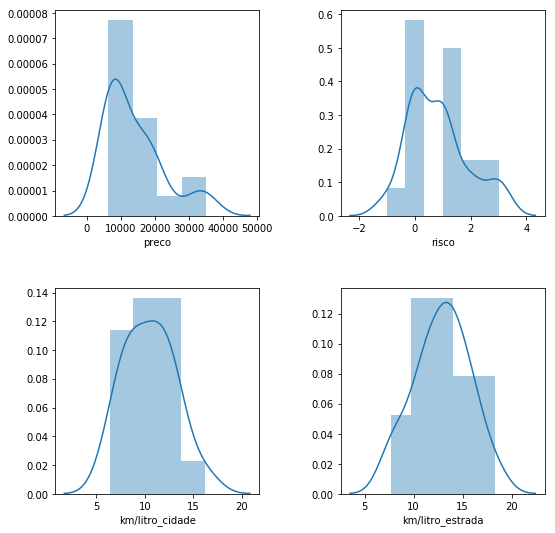

In [61]:
#Distribuição das variáveis quantitativas
features = ["montadora", "preco", "risco", "km/litro_cidade", "km/litro_estrada"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for col, ax in zip(features[1:], axs.ravel()):
    x=car_final.loc[:,col]
    sns.distplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4);

In [62]:
car_final.groupby('montadora')['preco'].max()

montadora
audi             17580.0
bmw              18947.5
chevrolet         6295.0
dodge             7150.5
honda             7295.0
jaguar           32250.0
mazda             8495.0
mercedes-benz    35056.0
mitsubishi        7939.0
nissan            8249.0
peugot           16105.0
plymouth          7150.5
porsche          22018.0
saab             15275.0
subaru            7894.0
toyota            9103.0
volkswagen        8495.0
volvo            17632.5
Name: preco, dtype: float64

In [63]:
[[car_final.preco.max(),car_final.preco.min()]]

[[35056.0, 6295.0]]

In [64]:
car_final.groupby('montadora')['km/litro_cidade'].max()

montadora
audi              7.87
bmw               9.35
chevrolet        16.16
dodge            13.18
honda            12.76
jaguar            6.38
mazda            11.05
mercedes-benz     6.80
mitsubishi       10.63
nissan           13.18
peugot            8.08
plymouth         13.18
porsche           8.08
saab              8.93
subaru           11.05
toyota           11.48
volkswagen       11.48
volvo             8.93
Name: km/litro_cidade, dtype: float64

In [65]:
[[car_final['km/litro_cidade'].min(), car_final['km/litro_cidade'].max()]]

[[6.38, 16.16]]

In [66]:
car_final.groupby('montadora')['km/litro_estrada'].max()

montadora
audi              9.99
bmw              12.12
chevrolet        18.28
dodge            16.16
honda            14.46
jaguar            8.08
mazda            13.61
mercedes-benz     7.65
mitsubishi       13.61
nissan           15.73
peugot           10.20
plymouth         16.16
porsche          11.48
saab             11.90
subaru           13.18
toyota           13.61
volkswagen       14.46
volvo            11.27
Name: km/litro_estrada, dtype: float64

In [67]:
[[car_final['km/litro_estrada'].min(), car_final['km/litro_estrada'].max()]]

[[7.65, 18.28]]

In [68]:
car_final.preco.median()

8799.0

In [69]:
car_final.risco.median()

1.0

### Análise por marca: ### 

1. Notamos que o valor médio dos automóveis por marca é de 8799,00
2. Em relação o risco médio dos automóveis por marca é de 1.0
3. Em média as marcas fazem aproximadamente 10 km/ litros na cidade e entre 10 e 15km/litro na estrada. 
4. A marca com o preço médio mais alto é a Mercedez-Benz e a marca com o carro mais barato é a Chevrolet
5. A marca menos econômica, em média, na cidade é a Jaguar e a mais econômica, em média, é a Chevrolet
6. A marca menos econômica, em média, na estrada é a Mercedez-Benz enquanto que a mais econômica é a Chevrolet

## Árvore de Decisão ## 

Observando a correlação entre as variáveis notamos que preço está correlacionado com:  highway mpg, horsepower, engine size, weight, width, length e weel base.

Será que conseguiríamos classificar os carros entre caros e baratos baseado-se em seu peso?

Para responder essa pergunta, escolhi fazer um modelo baeado na árvore de decisão classificatória. 

In [9]:
df_tree = df.copy() # crio um novo dataset baseado no dataframe "mãe"

In [10]:
df_tree.head()

,riskiness,losses,make,fuel type,aspiration,doors,body,drive,engine location,wheel base,...,engine size,fuel system,bore,stroke,compression ratio,horsepower,peak rpm,city mpg,highway mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [11]:
# limpando o dataset para aplicar o modelo
df_tree.drop(columns = ['make','riskiness', 'losses', 'fuel type', 'aspiration', 'doors',
                      'body', 'drive', 'engine location','engine type', 
                      'cylinders', 'engine size', 'fuel system', 
                      'bore', 'stroke','compression ratio', 
                      'peak rpm'],inplace=True)
df_tree.head()

,wheel base,length,width,height,weight,horsepower,city mpg,highway mpg,price
0,99.8,176.6,66.2,54.3,2337,102,24,30,13950
1,99.4,176.6,66.4,54.3,2824,115,18,22,17450
2,105.8,192.7,71.4,55.7,2844,110,19,25,17710
3,105.8,192.7,71.4,55.9,3086,140,17,20,23875
4,101.2,176.8,64.8,54.3,2395,101,23,29,16430


Criamos uma nova coluna para inserir a classificação barato e caro, onde: barato = 0 e caro = 1

In [12]:
# criando uma nova coluna:
df_tree['classificacao'] = 0
df_tree.head()

,wheel base,length,width,height,weight,horsepower,city mpg,highway mpg,price,classificacao
0,99.8,176.6,66.2,54.3,2337,102,24,30,13950,0
1,99.4,176.6,66.4,54.3,2824,115,18,22,17450,0
2,105.8,192.7,71.4,55.7,2844,110,19,25,17710,0
3,105.8,192.7,71.4,55.9,3086,140,17,20,23875,0
4,101.2,176.8,64.8,54.3,2395,101,23,29,16430,0


In [13]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 10 columns):
wheel base       159 non-null float64
length           159 non-null float64
width            159 non-null float64
height           159 non-null float64
weight           159 non-null int64
horsepower       159 non-null int64
city mpg         159 non-null int64
highway mpg      159 non-null int64
price            159 non-null int64
classificacao    159 non-null int64
dtypes: float64(4), int64(6)
memory usage: 12.5 KB


In [14]:
df_tree['classificacao'] = np.where(df_tree['price'] >=10000, 1,0)
df_tree.head(9) #observo que o comando fez corretamente o que queríamos

,wheel base,length,width,height,weight,horsepower,city mpg,highway mpg,price,classificacao
0,99.8,176.6,66.2,54.3,2337,102,24,30,13950,1
1,99.4,176.6,66.4,54.3,2824,115,18,22,17450,1
2,105.8,192.7,71.4,55.7,2844,110,19,25,17710,1
3,105.8,192.7,71.4,55.9,3086,140,17,20,23875,1
4,101.2,176.8,64.8,54.3,2395,101,23,29,16430,1
5,101.2,176.8,64.8,54.3,2395,101,23,29,16925,1
6,101.2,176.8,64.8,54.3,2710,121,21,28,20970,1
7,101.2,176.8,64.8,54.3,2765,121,21,28,21105,1
8,88.4,141.1,60.3,53.2,1488,48,47,53,5151,0


In [15]:
#excluímos a coluna price, já que temos uma classificação
df_tree.drop(columns = 'price', inplace = True)

In [16]:
# começamos a preparar os dados para rodar o modelo
from sklearn import tree # importanando a árvore de decisão

In [17]:
x = df_tree[['weight','wheel base', 'length', 'width', 'height', 'horsepower','city mpg', 'highway mpg']]
y = df_tree[['classificacao']]

In [18]:
clf = tree.DecisionTreeClassifier( max_depth=2, max_leaf_nodes=2, criterion='entropy') # folhas, nó sem filho
clf = clf.fit(x, y)

In [19]:
clf # mostra como está calibrado o algoritimo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=2, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Decidimos como máxima profundidade o número dois para ficar mais fácil a visualização e a compreensão do que estavamos classificando. 

In [34]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("treebaratocaro1",view=True, )

'treebaratocaro1.pdf'

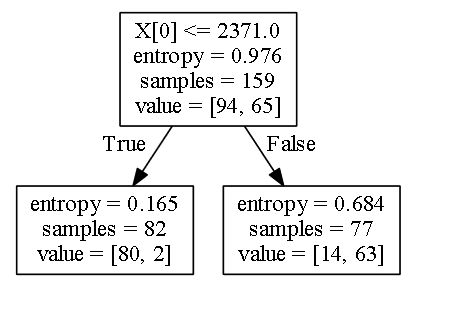

In [36]:
from IPython.display import Image
Image('tree.png')

A árvore dividiu as variáveis da seguinte maneira:
94 carros são baratos (valor abaixo de 10 mil)
65 carros são caros (valor acima de 10 mil)

Como X[0] baseia-se no peso dos carros ('weight'), a árvore utilizou o valor de 2371.0 para realizar a divisão, com uma entropia (quantidade de informação) de 0.976.

Caso quizessemos construir uma árvore preditiva baseando-se no peso, nós dividiramos as informações em treino e teste, sendo que o treino seria de aproximadamente 80% e o teste de aproximadamente 20% dos dados. 

Ao construírmos este modelo, poderíamos rodá-lo em novos datasets contendo esses parâmetros para predizer, por exemplo, se há mais carros baratos ou caros em um determminado depósito. 